In [1]:
'''Word Cloud visual image analysis of almost half a million tweets from September regarding the 2020 elections'''

'Word Cloud visual image analysis of almost half a million tweets from September regarding the 2020 elections'

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m216126\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path = r'C:\Users\m216126\Documents\capstoneStuff\twitterCapture\captures\september'      # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
li = []
for file in all_files:
    df = pd.read_csv(file, index_col = None, header=0)
    li.append(df)

In [4]:
# Naming the columns

for i in range(len(li)):
    li[i].columns = ['Date','id','tweet','tweet_info','metadata']

In [5]:
## Concatenate all the files into a single dataset

frames = []

for i in range(len(li)):
    frames.append(li[i])
tweet_dataset = pd.concat(frames, ignore_index=True)

In [6]:
tweet_dataset.shape 

(468447, 5)

In [7]:
tweet_dataset.tail()

,Date,id,tweet,tweet_info,metadata
468442,2020-09-10 00:59:36,1303860643523567617,"b""RT @JRinPueblo: Kamala Harris Calls For \xe2...",User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468443,2020-09-10 00:59:36,1303860643469160448,"b'RT @glennkirschner2: In January, Trump knew ...",User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468444,2020-09-10 00:59:36,1303860643427123205,b'@KamalaHarris @JoeBiden Trump is scared of y...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468445,2020-09-10 00:59:36,1303860643364253698,b'RT @karentravers: NEW: just asked @JoeBiden ...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468446,2020-09-10 00:59:36,1303860643334942722,b'RT @KamalaHarris: Trump knew in February. \n...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [8]:
#Cleaning Tweets

corpus = []
for i in range(0, int(tweet_dataset.shape[0])):
    try:
        tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['tweet'][i])
        tweet = tweet.lower()
        tweet = re.sub("b'", '', tweet)
        tweet = re.sub('https', '', tweet)
        tweet = tweet.split()
        ps = PorterStemmer()
        tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
        for j in range(len(tweet)):
            if len(tweet[j]) <= 3:
                tweet[j] = ''
            elif (len(tweet[j]) == 4) and (tweet[j][0]=='x'):
                tweet[j] = ''
            elif (len(tweet[j]) == 5) and (tweet[j][0]=='x'):
                tweet[j] = ''
        tweet = ' '.join(tweet)
        corpus.append(tweet)
    except:
        continue

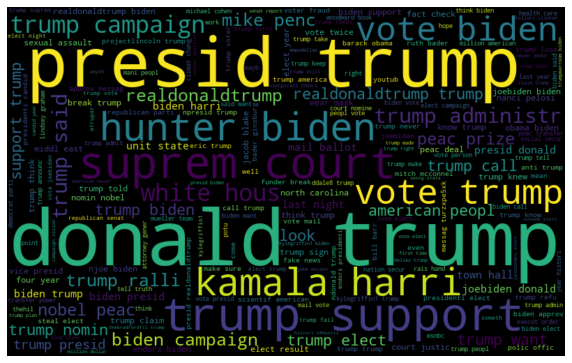

In [9]:
#Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()